###Máquina de soporte vectorial para clasificación con Kernel gaussiano

In [81]:
import pandas as pd
import numpy as np
import csv
import random
import math
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.svm import SVC
from sklearn import svm
from sklearn.cross_validation import train_test_split
from sklearn.utils import column_or_1d
%matplotlib inline

#### 1) Se cargan el set de datos y se asigna el porcentaje de entrenamiento

In [82]:
entradas=1000
X=np.array([[random.uniform(-1,1),
             random.uniform(-1,1)] 
            for x in range(entradas)])
y=[]

In [83]:
for i in range(entradas):
    circle = (X[i,0]**2)+(X[i,1]**2)
    if (circle <= 1):
        y.append(1) 
    else:
        y.append(0)    

In [84]:
y=np.array(y)

####2) Separamos porcentaje de entrenamiento y visualizamos

In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,train_size=0.75)
print len(X_train), len(X_test)

750 250


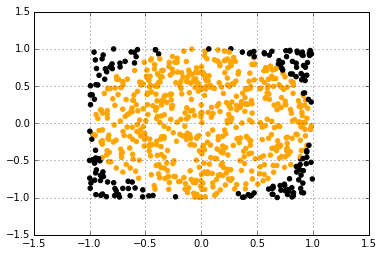

In [86]:
plt.scatter(X_train[:,0], X_train[:,1], 
            color=['black' if i==0 else 'orange' for i in Y_train] )
plt.grid()

#### 2) Transformación de los datos

In [87]:
Y_test = pd.DataFrame(Y_test)
Y_test.columns = ['Y_test']

Y_train = column_or_1d(Y_train)

#### 3) Se define el kernel para el SVM y se ajusta el modelo

In [129]:
clf = svm.SVC(kernel='rbf', gamma=40)
model_circle=clf.fit(X_train, Y_train)
model_circle

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=40,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

####4) Valores de coeficientes y cálculo del umbral de hyperplano

In [130]:
xx, yy = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
umbral = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
umbral = umbral.reshape(xx.shape)
print umbral

[[-0.57011207 -0.66523166 -0.74669195 ..., -0.5205515  -0.40992813
  -0.29641507]
 [-0.67477788 -0.7735996  -0.8562102  ..., -0.61575105 -0.49824101
  -0.37668618]
 [-0.76586157 -0.86608705 -0.94766833 ..., -0.70019969 -0.57827046
  -0.4510857 ]
 ..., 
 [-0.77957899 -0.89330714 -0.98778349 ..., -1.08365121 -1.02884786
  -0.94921095]
 [-0.72177931 -0.83054355 -0.92135691 ..., -1.03463933 -0.98534627
  -0.91084483]
 [-0.64000694 -0.74216747 -0.82826494 ..., -0.95418439 -0.90987292
  -0.84099893]]


#### 5) Visualización de clasificación multidimensional con SVM kernel gaussiano RBF

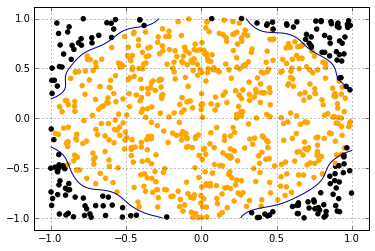

In [133]:
plt.contour(xx, yy, umbral, levels=[0])
plt.scatter(X_train[:,0], X_train[:,1], 
            color=['black' if i==0 else 'orange' for i in Y_train] )
plt.grid()

#### 6) Predicciones del modelo entrenado con los datos de prueba

In [134]:
Y_hat = model_circle.predict(X_test)
Y = Y_test
Y['Y_hat'] = Y_hat
Y.groupby('Y_test').mean()
Y.head()

,Y_test,Y_hat,matriz_confusion
0,1,1,TP
1,1,1,TP
2,1,1,TP
3,1,1,TP
4,1,1,TP


####7) Matriz de confusión

In [135]:
matriz_confusion = [] 

for i in range(len(Y_test)):    
    if Y["Y_test"].iloc[i] == 0:
        if Y["Y_hat"].iloc[i] == 0:
            matriz_confusion.append("TN")
        else:
            matriz_confusion.append("FP")
    else:
        if Y["Y_hat"].iloc[i] == 0:
            matriz_confusion.append("FN")
        else:
            matriz_confusion.append("TP")

In [136]:
Y.loc[:,"matriz_confusion"] = matriz_confusion
Y.groupby("matriz_confusion").count()["Y_hat"]

matriz_confusion
FN      5
FP      5
TN     38
TP    202
Name: Y_hat, dtype: int64

In [137]:
conf = confusion_matrix(Y.iloc[:,0], Y.iloc[:,1])
cm_normalized = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]

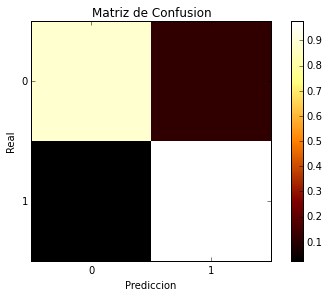

In [138]:
plt.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.get_cmap('afmhot'))
plt.title("Matriz de Confusion")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["0","1"])
plt.yticks(tick_marks, ["0","1"])
plt.tight_layout()
plt.ylabel('Real')
plt.xlabel('Prediccion')

####7) Bondad de ajuste del modelo de clasificación

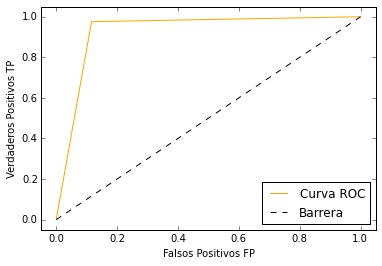

In [142]:
fpr, tpr, thresholds = roc_curve(Y['Y_test'], Y['Y_hat'])
plt.plot(fpr, tpr, lw=1, color='orange', label='Curva ROC')
plt.axis([-0.05, 1.05, -0.05, 1.05])
plt.plot([0, 1], [0, 1], '--', color='black', label='Barrera')
plt.xlabel('Falsos Positivos FP')
plt.ylabel('Verdaderos Positivos TP')
plt.legend(loc="lower right")